# EDA를 통해 데이터 탐색하기

당뇨병 데이터셋 설명

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml) / *0은 결측치*
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

## 라이브러리 로드 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전 주피터 노트북 시각화 표시
# %matplotlib inline

## 데이터 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
# 위에서 다섯 개만 미리보기
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보를 본다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치를 본다.
df_null = df.isnull()
df_null.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# 수치데이터에 대한 요약을 본다.
# df.describe(include='object') object값도 출력
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


글루코스, 혈압, 피부 주름 두께, BMI 최소값 0은 결측치가 아닐까 의심된다.

In [8]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화

0이 나올 수 없는 인슐린이나 혈압 등의 값을 결측치로 처리하고 시각화해보자.

In [9]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
# 결측치의 비율
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

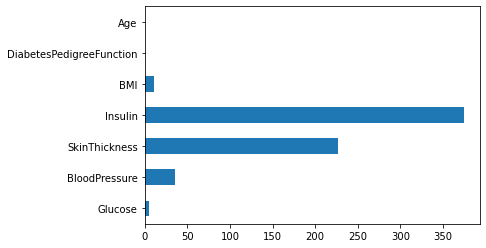

In [12]:
# 결측치 갯수를 구해 막대 그래프로 시각화하기
df_null.sum().plot.barh()

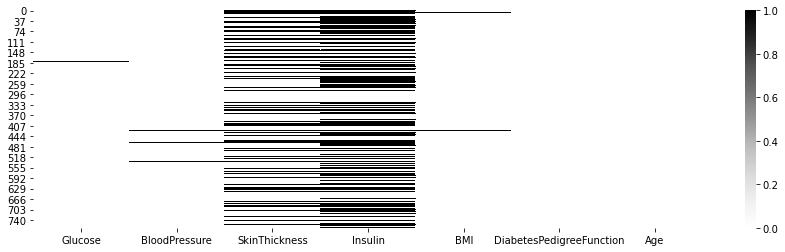

In [13]:
# 결측치를 heatmap으로 시각화하기
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys')

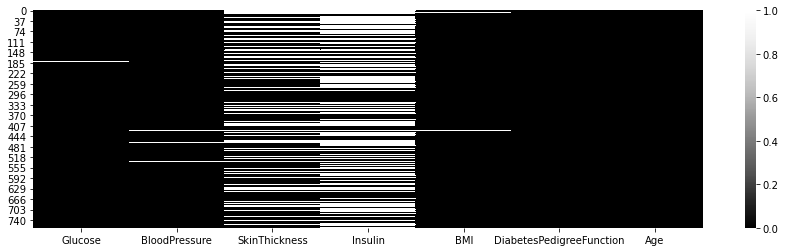

In [14]:
# 결측치를 heatmap으로 시각화하기
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

## 정답값
target == label == 정답값

In [15]:
# 정답값인 Outcome의 갯수를 보자.
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
# 발병 비율
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [17]:
# 임신횟수와 정답값을 비교
# df.groupby(['인덱스에 올 컬럼명'])['value로 사용할 컬럼명'].aag([''])
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


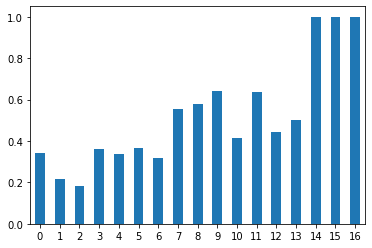

In [18]:
# 임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)

## countplot

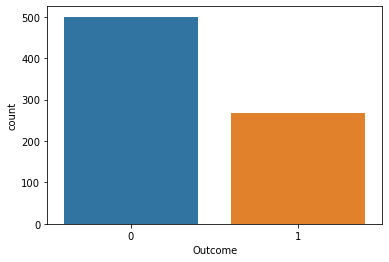

In [19]:
# 당뇨병 발병 비율
sns.countplot(data=df, x='Outcome')

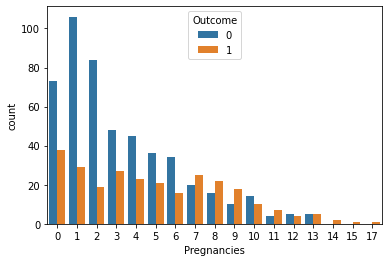

In [20]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x='Pregnancies',hue='Outcome')

14,15,16 데이터들은 샘플 수가 적어서 오버피팅되기 쉽다.

In [21]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수 생성
df['Pregnancies_high'] = df['Pregnancies'] > 6

# 여러 개의 컬럼은 list로 가져와야 한다.
df[['Pregnancies_high', 'Pregnancies']].head()

,Pregnancies_high,Pregnancies
0,False,6
1,False,1
2,True,8
3,False,1
4,False,0


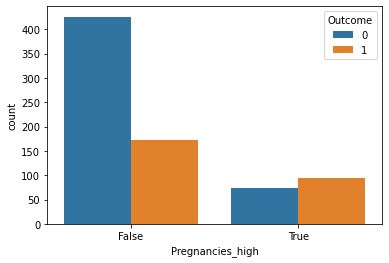

In [22]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현한다.
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

임신 횟수가 6회 이하인 경우가 많고 임신횟수가 7회 이상이면 당뇨병 발병율이 높아진다.

## barplot

y축의 값은 평균값이다.

bar 위에 검은색 선은 신뢰구간을 의미한다.

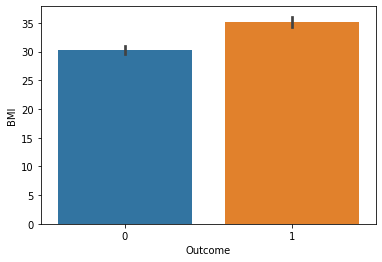

In [23]:
# 당뇨병 발병에 따른 BMI 수치 비교
sns.barplot(data=df, x='Outcome', y='BMI')

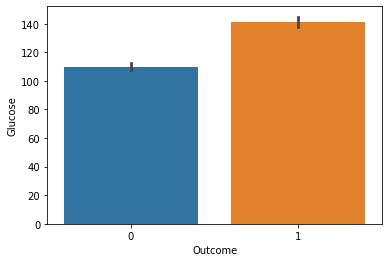

In [24]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치 비교
sns.barplot(data=df, x='Outcome', y='Glucose')

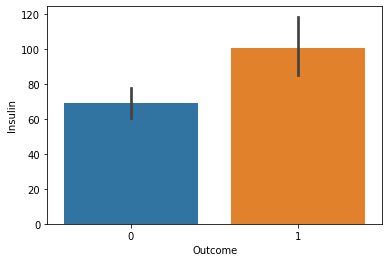

In [25]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병 비교
sns.barplot(data=df, x='Outcome', y='Insulin')

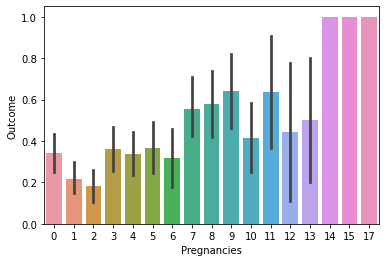

In [26]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교
sns.barplot(data=df, x='Pregnancies', y='Outcome')

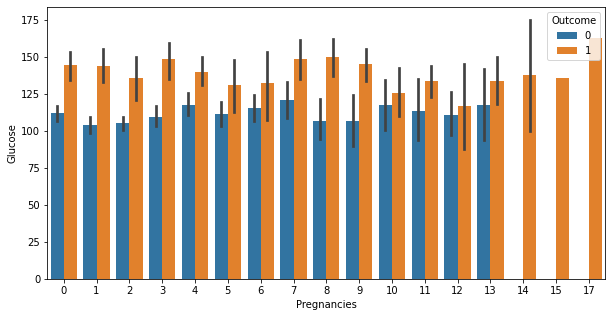

In [27]:
# 임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

당뇨병 환자는 포도당 지수가 높다.

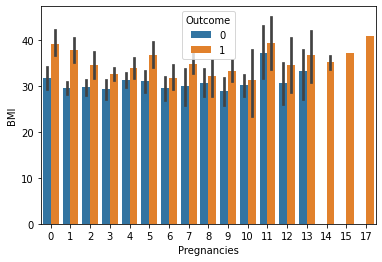

In [28]:
# 임신횟수에 따른 체질량지수(BMI)를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

BMI 수치와 임신 횟수 간의 연관도는 없어 보인다. 당뇨병 환자는 BMI 지수가 높다.

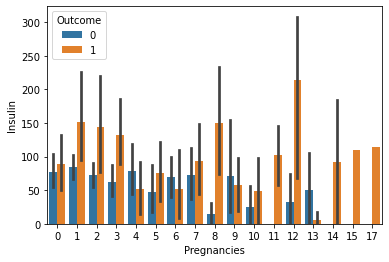

In [29]:
sns.barplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')

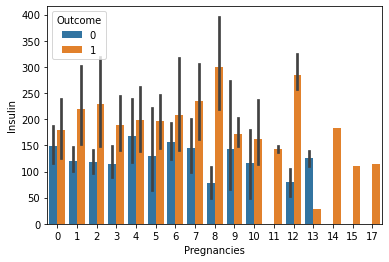

In [30]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다.
sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

당뇨병 환자는 인슐린 수치가 높다.

## boxplot

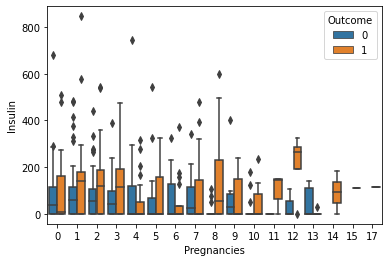

In [31]:
sns.boxplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')

임신횟수 12회의 box가 일부만 표현된 이유는 Insulin 값이 0인 경우가 많기 때문이다.

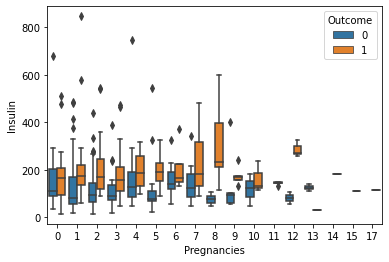

In [32]:
sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

당뇨병 환자는 인슐린 수치가 높다.

## violinplot

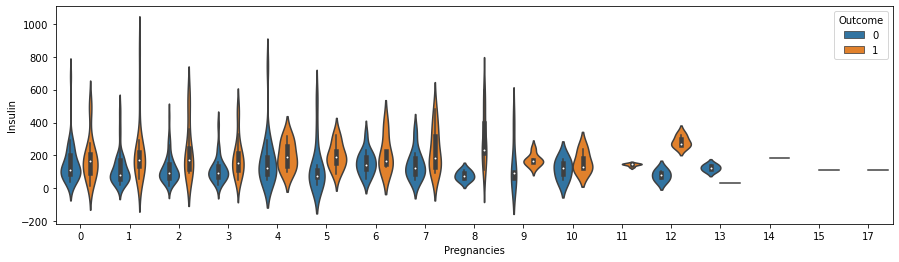

In [33]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

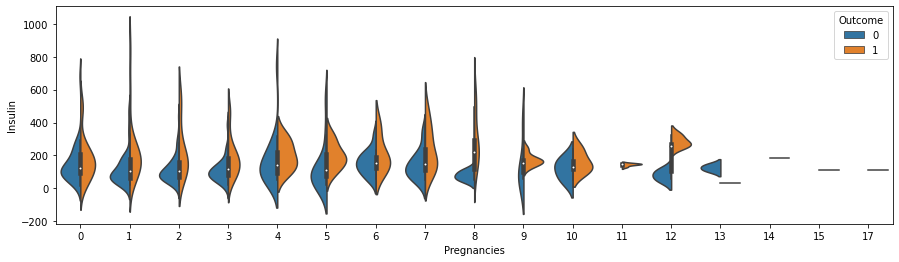

In [34]:
# split = True로 지정하면 분포를 확인할 수 있다.
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

## swarmplot

데이터의 개수 확인 가능

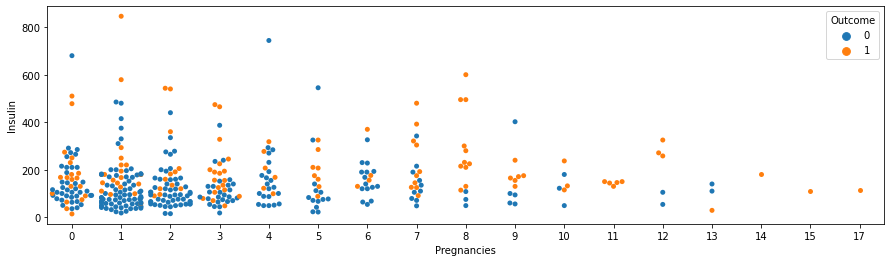

In [35]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## distplot

분포를 확인 가능하다.

기준을 잡아 범주형 변수를 만들 때 사용할 수 있다.

In [36]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

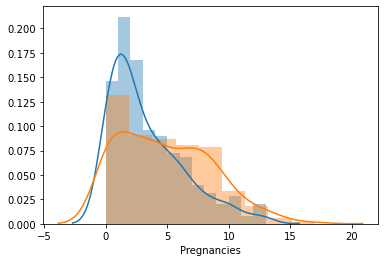

In [37]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

임신횟수 5회이상이면 당뇨병 발병 확률이 높아보인다.

부드러운 곡선은 밀도 추정 곡선이다.

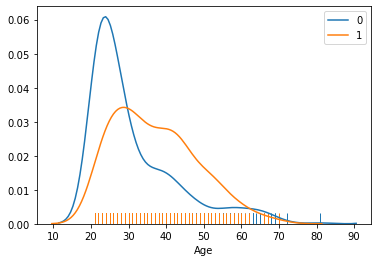

In [38]:
# 나이에 따른 당뇨병 발병 여부 시각화
sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)

30세 이후로 당뇨병 발병확률이 높아보인다.

## Subplots

### Pandas를 통한 histplot 그리기

In [39]:
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


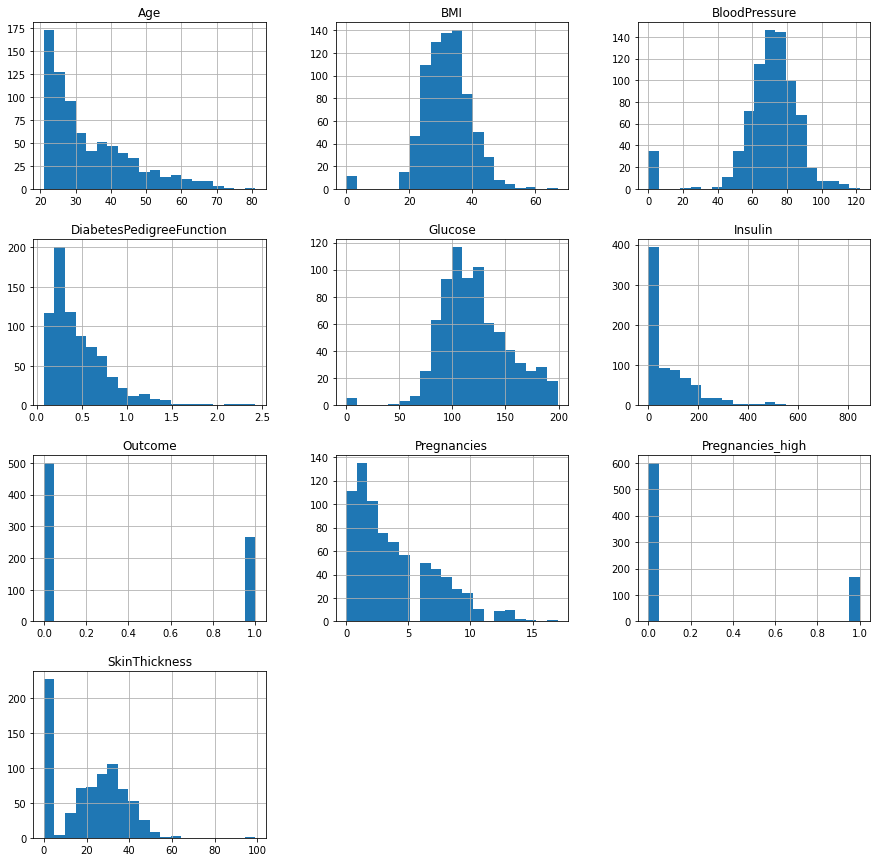

In [40]:
h = df.hist(figsize=(15,15), bins=20)

### 반복문을 통한 서브플롯 그리기

#### distplot

In [41]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화한다.
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

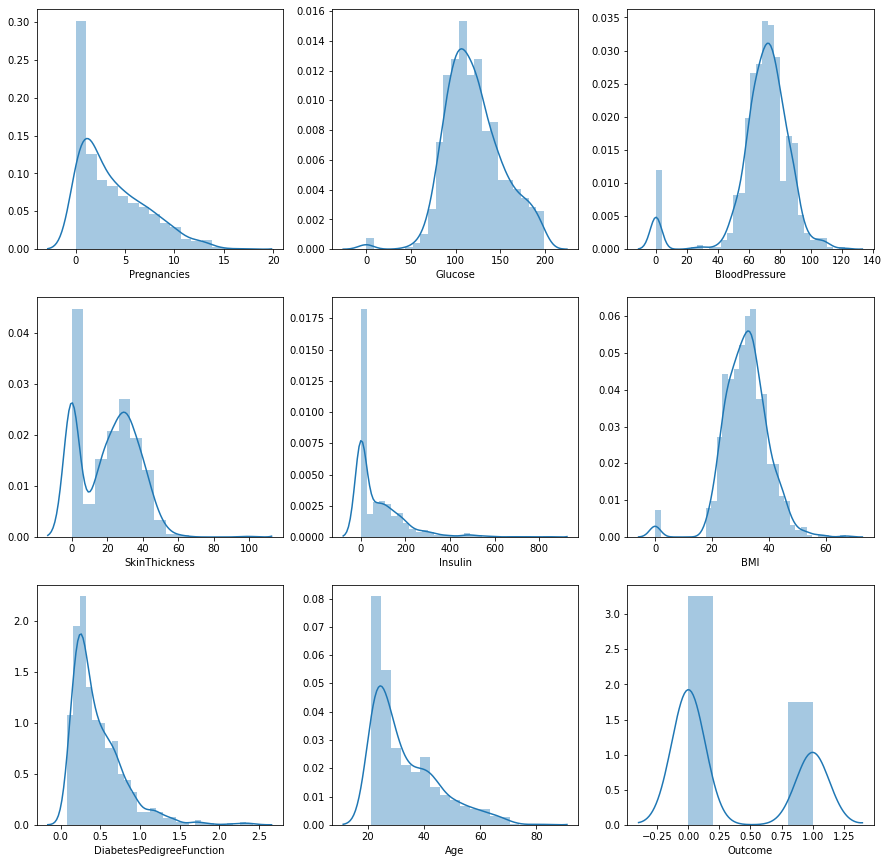

In [42]:
# distplot으로 서브플롯을 그린다.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
#     print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

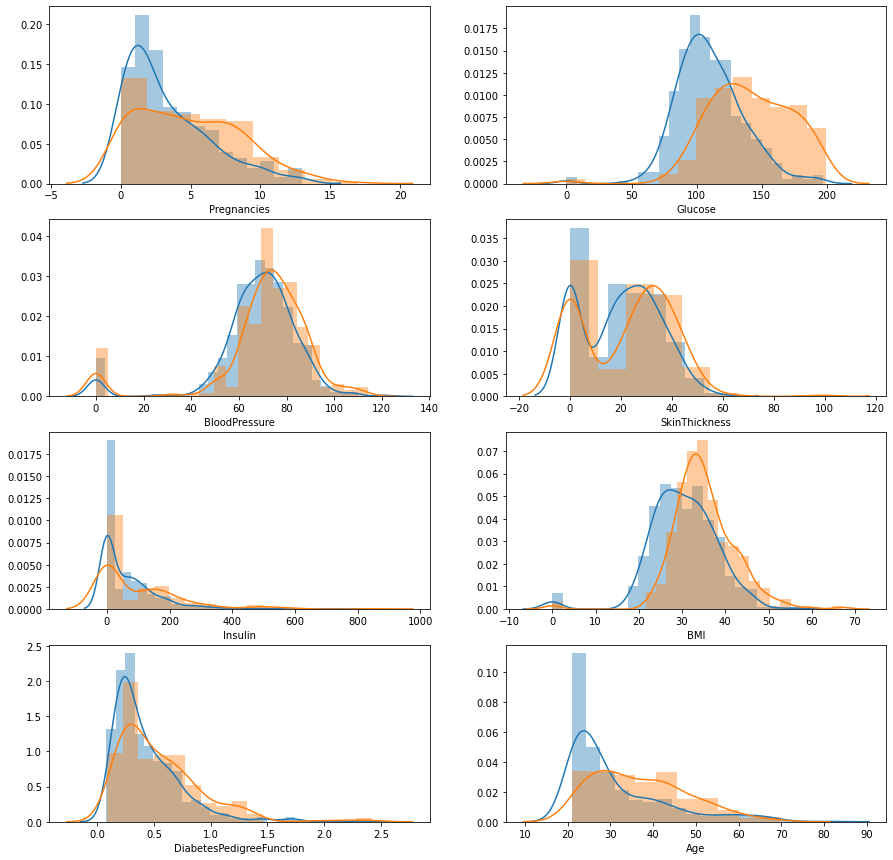

In [43]:
# 모든 변수에 대한 distplot을 그려보자.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
#     print(i, col_name, row, col)
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

임신횟수가 많은 경우가 샘플의 수가 적어서 예측 결과 당뇨병이 나올 확률이 높아진다. 

샘플의 수가 적은데 일반화하기 어렵고 이는 오버피팅을 발생시킬 수 있다.

30대 이후로 당뇨병 환자가 많다. 25세 30세를 기준으로 범주화를 해보자.

연속된 수치 데이터를 범주형으로 만들면 예측력이 높아진다.

데이터가 한쪽으로 몰려있으면 제대로 학습되지 않을 수 있기 때문에 정규분포로 변환하기도 한다.

#### violinplot

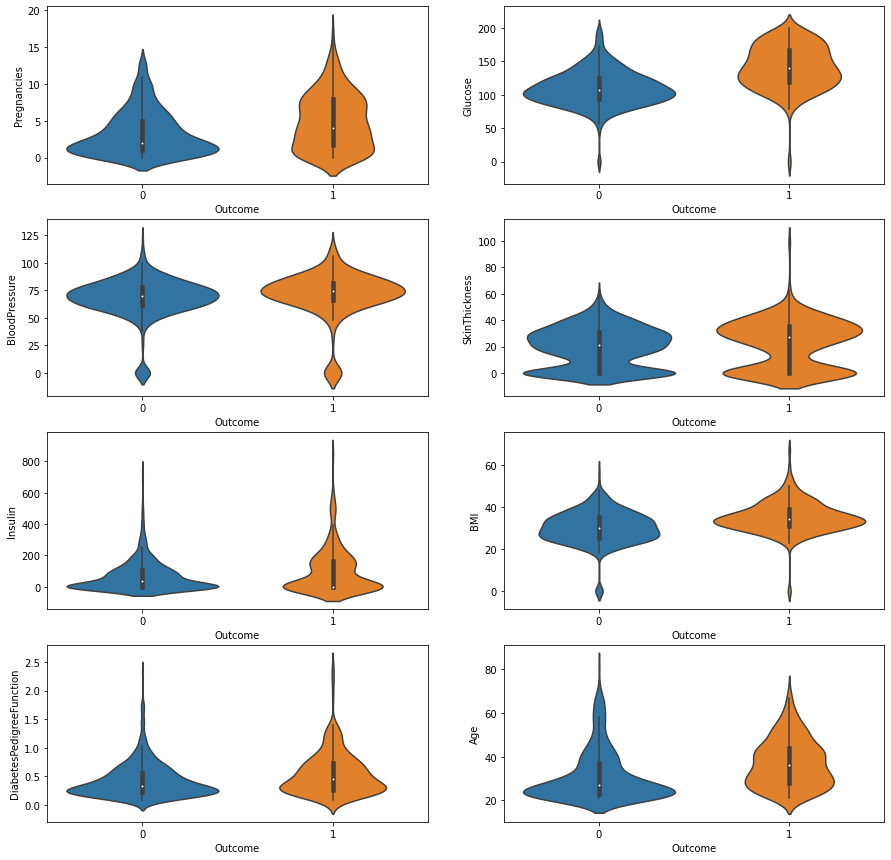

In [44]:
# violinplot으로 서브플롯을 그려보자.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
#     print(i, col_name, row, col)
    sns.violinplot(data = df, x='Outcome', y=col_name, ax=axes[row][col])

바이올린 그래프로 당뇨병 발병여부에 따른 결측치와 분포를 확인 가능하다.

#### lmplot

상관계수가 높을 것이라 추측되는 두 변수에 대해 시각화해보자.

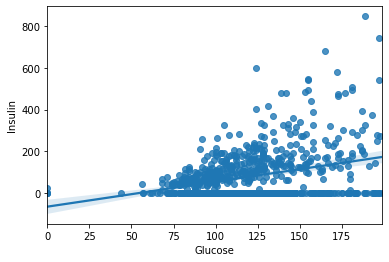

In [45]:
# Glucose와 Insulin의 회구선을 그려보자.
sns.regplot(data=df, x='Glucose',y='Insulin')

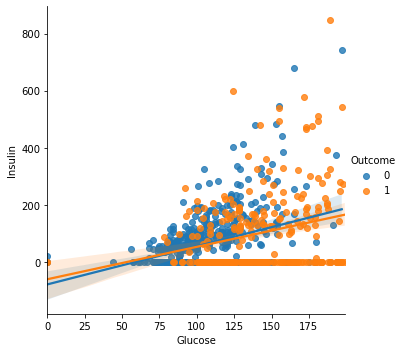

In [46]:
# Glucose와 Insulin을 Outcome으로 구분하자.
sns.lmplot(data=df, x='Glucose',y='Insulin', hue='Outcome')

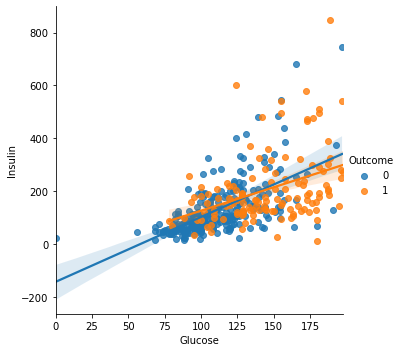

In [47]:
# Insulin 수치가 0 이상인 데이터로만 그려보자.
sns.lmplot(data=df[df['Insulin']>0], x='Glucose',y='Insulin', hue='Outcome')

#### pairplot

변수 간 상관관계를 확인할 때 사용한다.

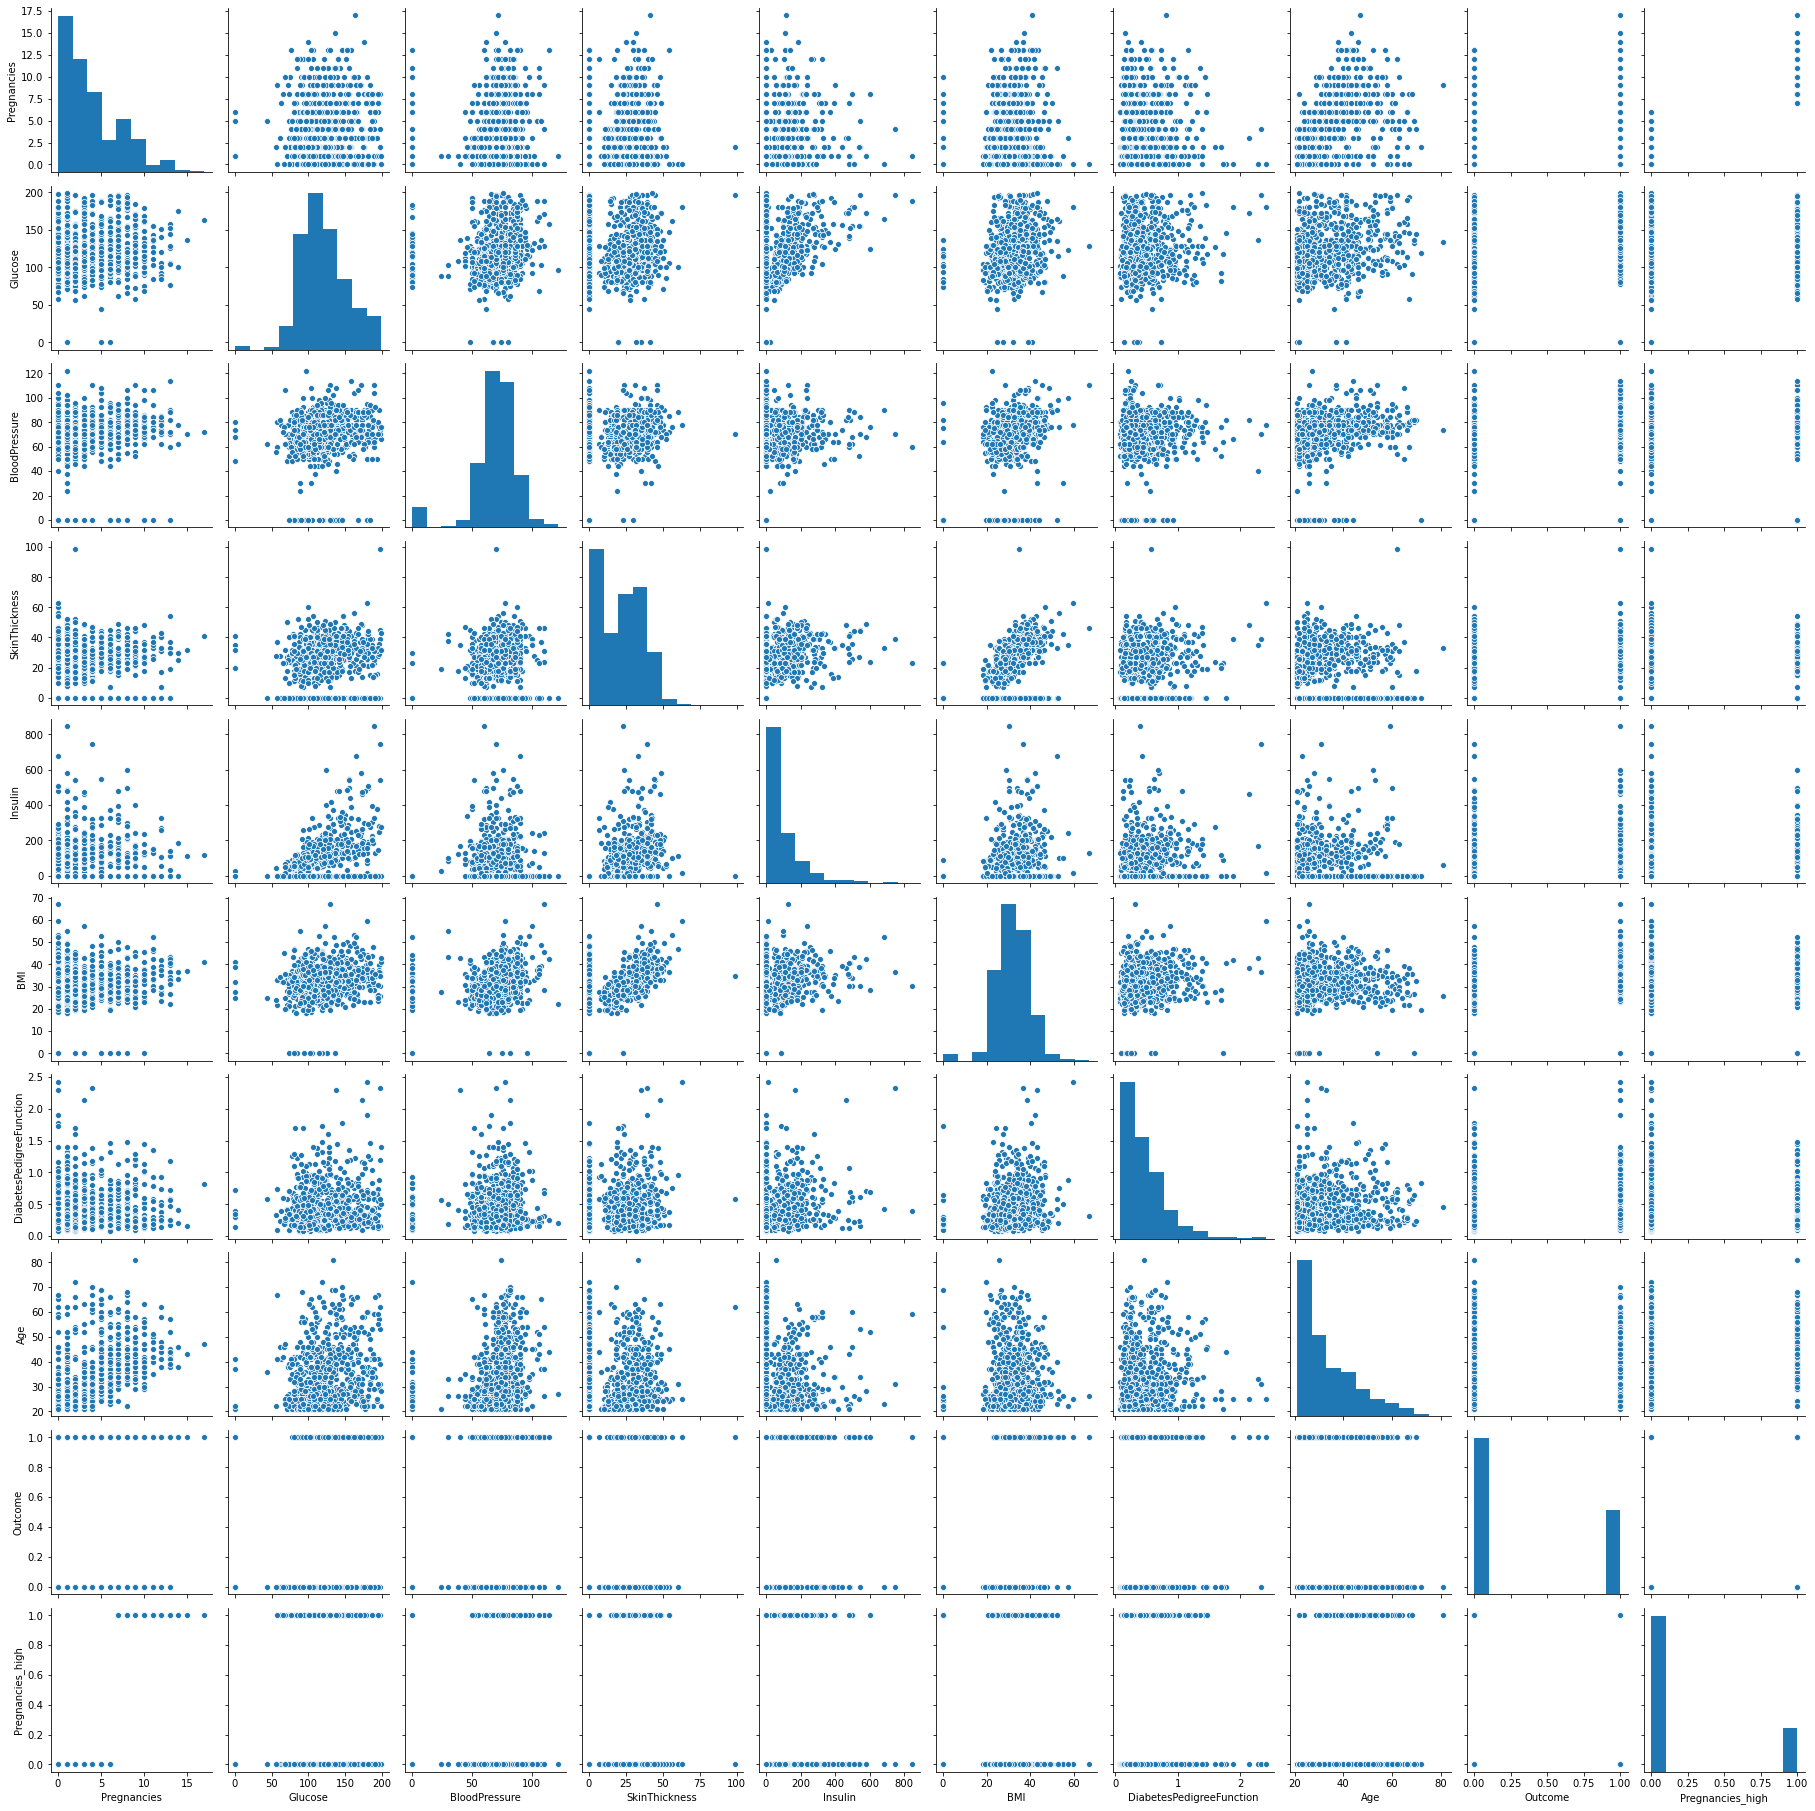

In [48]:
# 모든 변수 간 산점도를 그린다.
sns.pairplot(df)

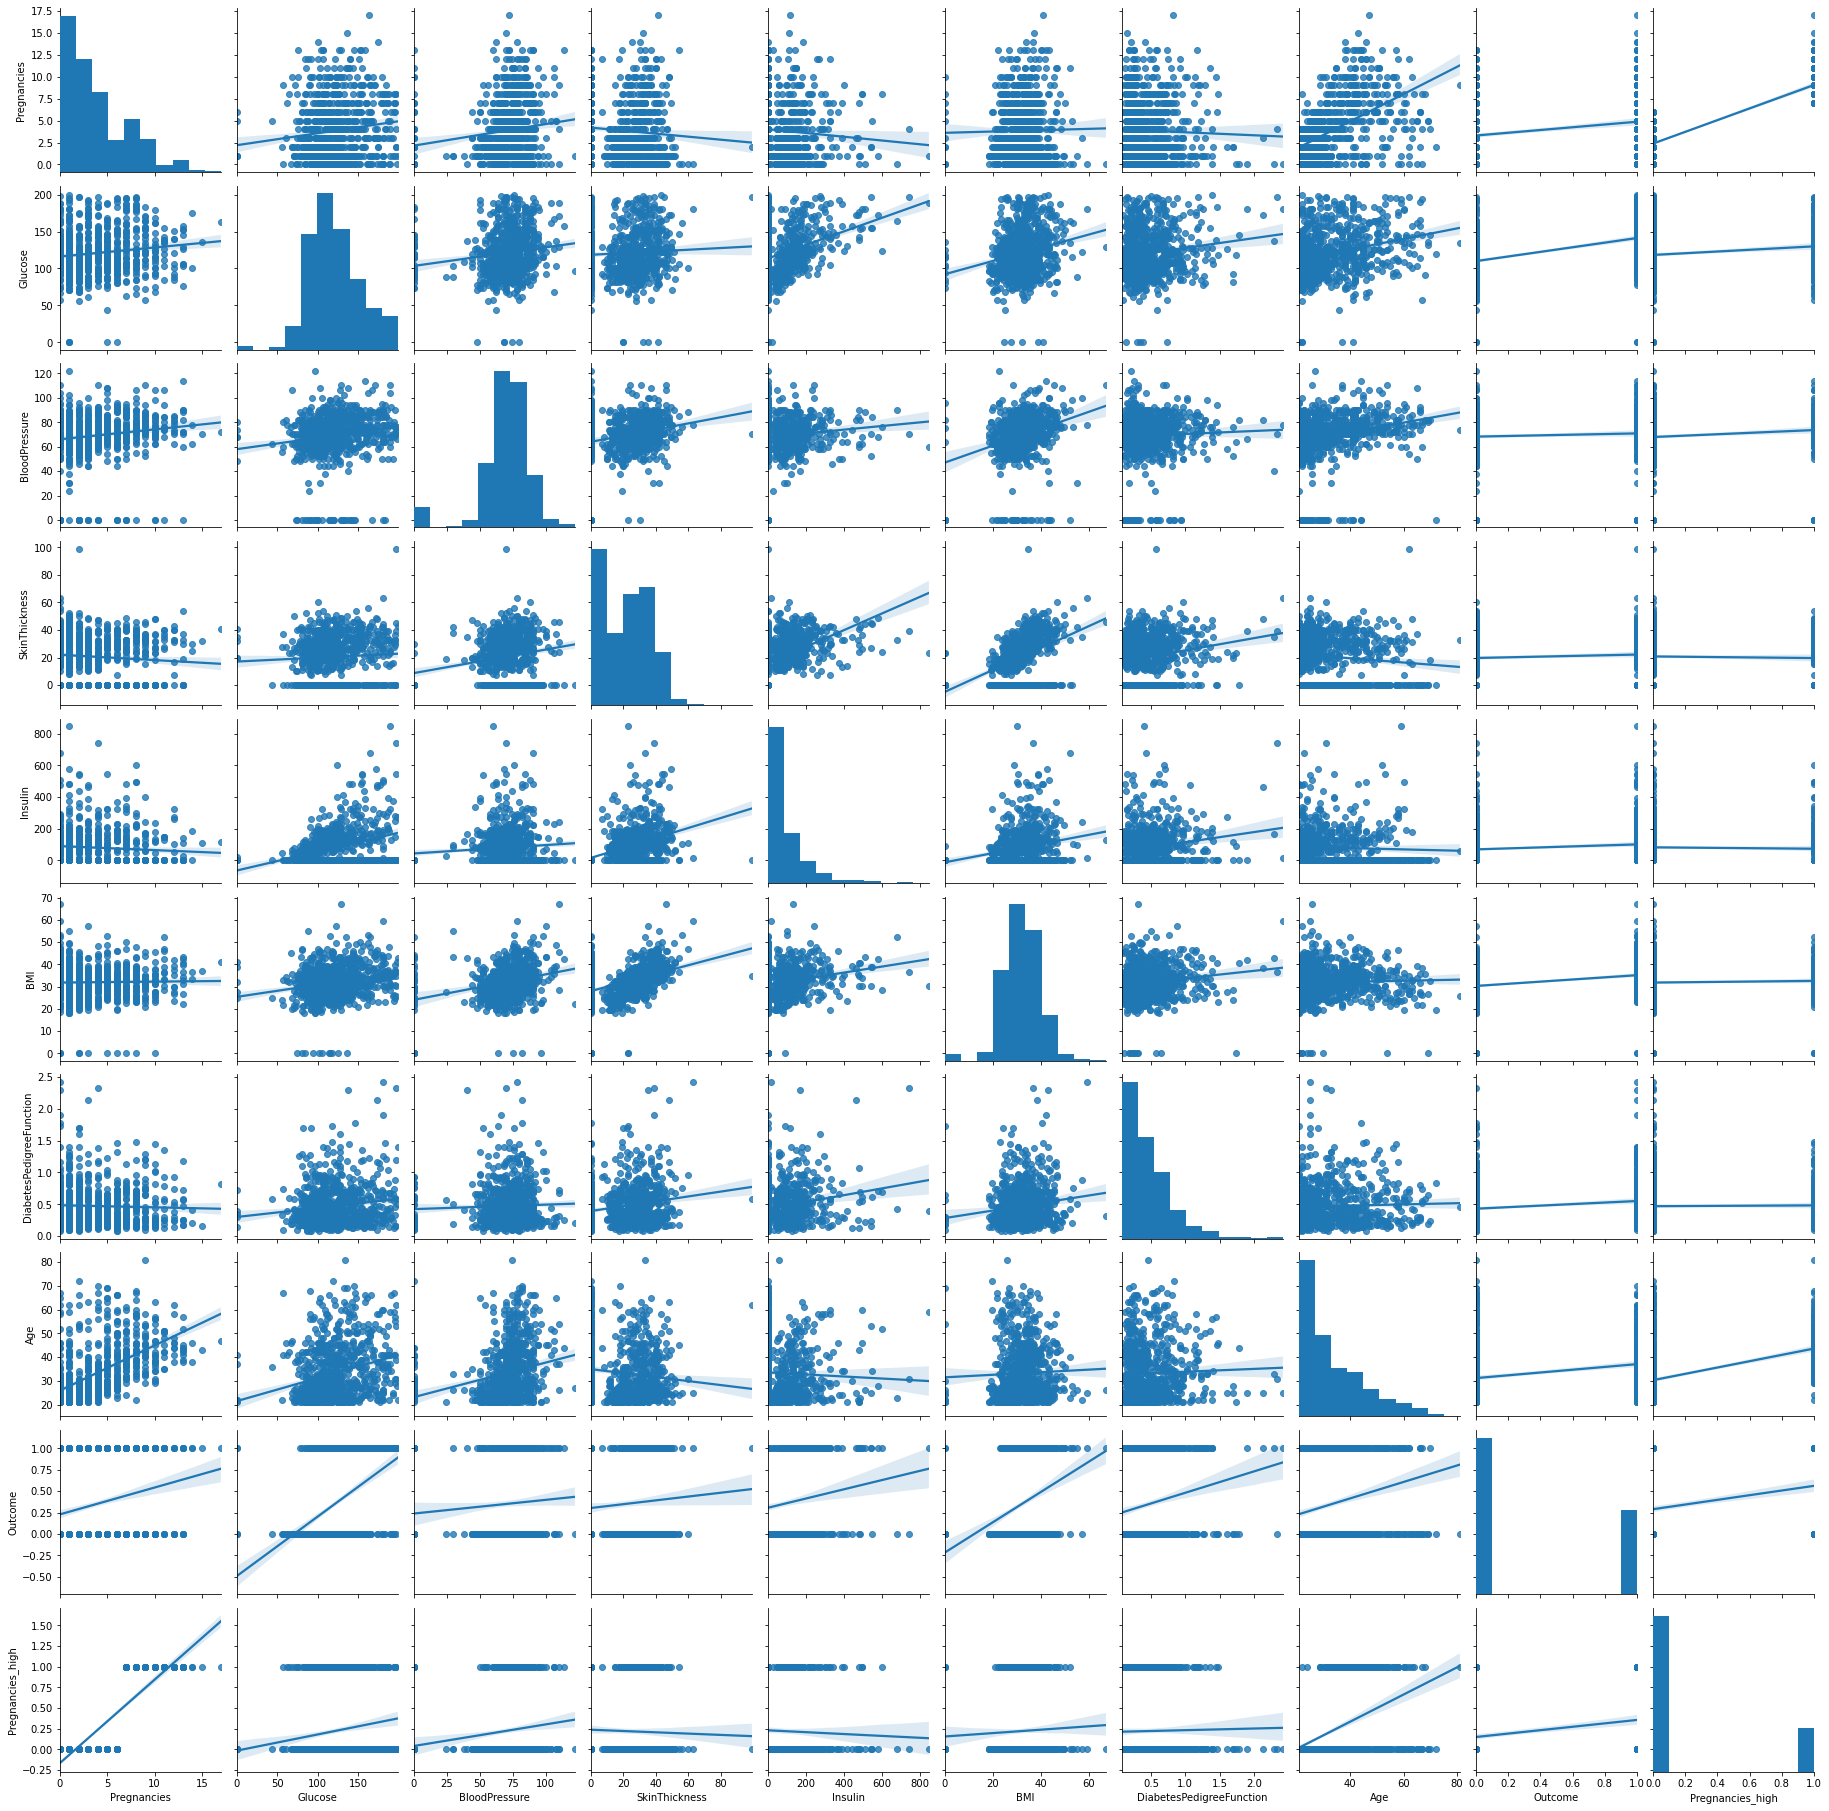

In [49]:
sns.pairplot(df, kind='reg')

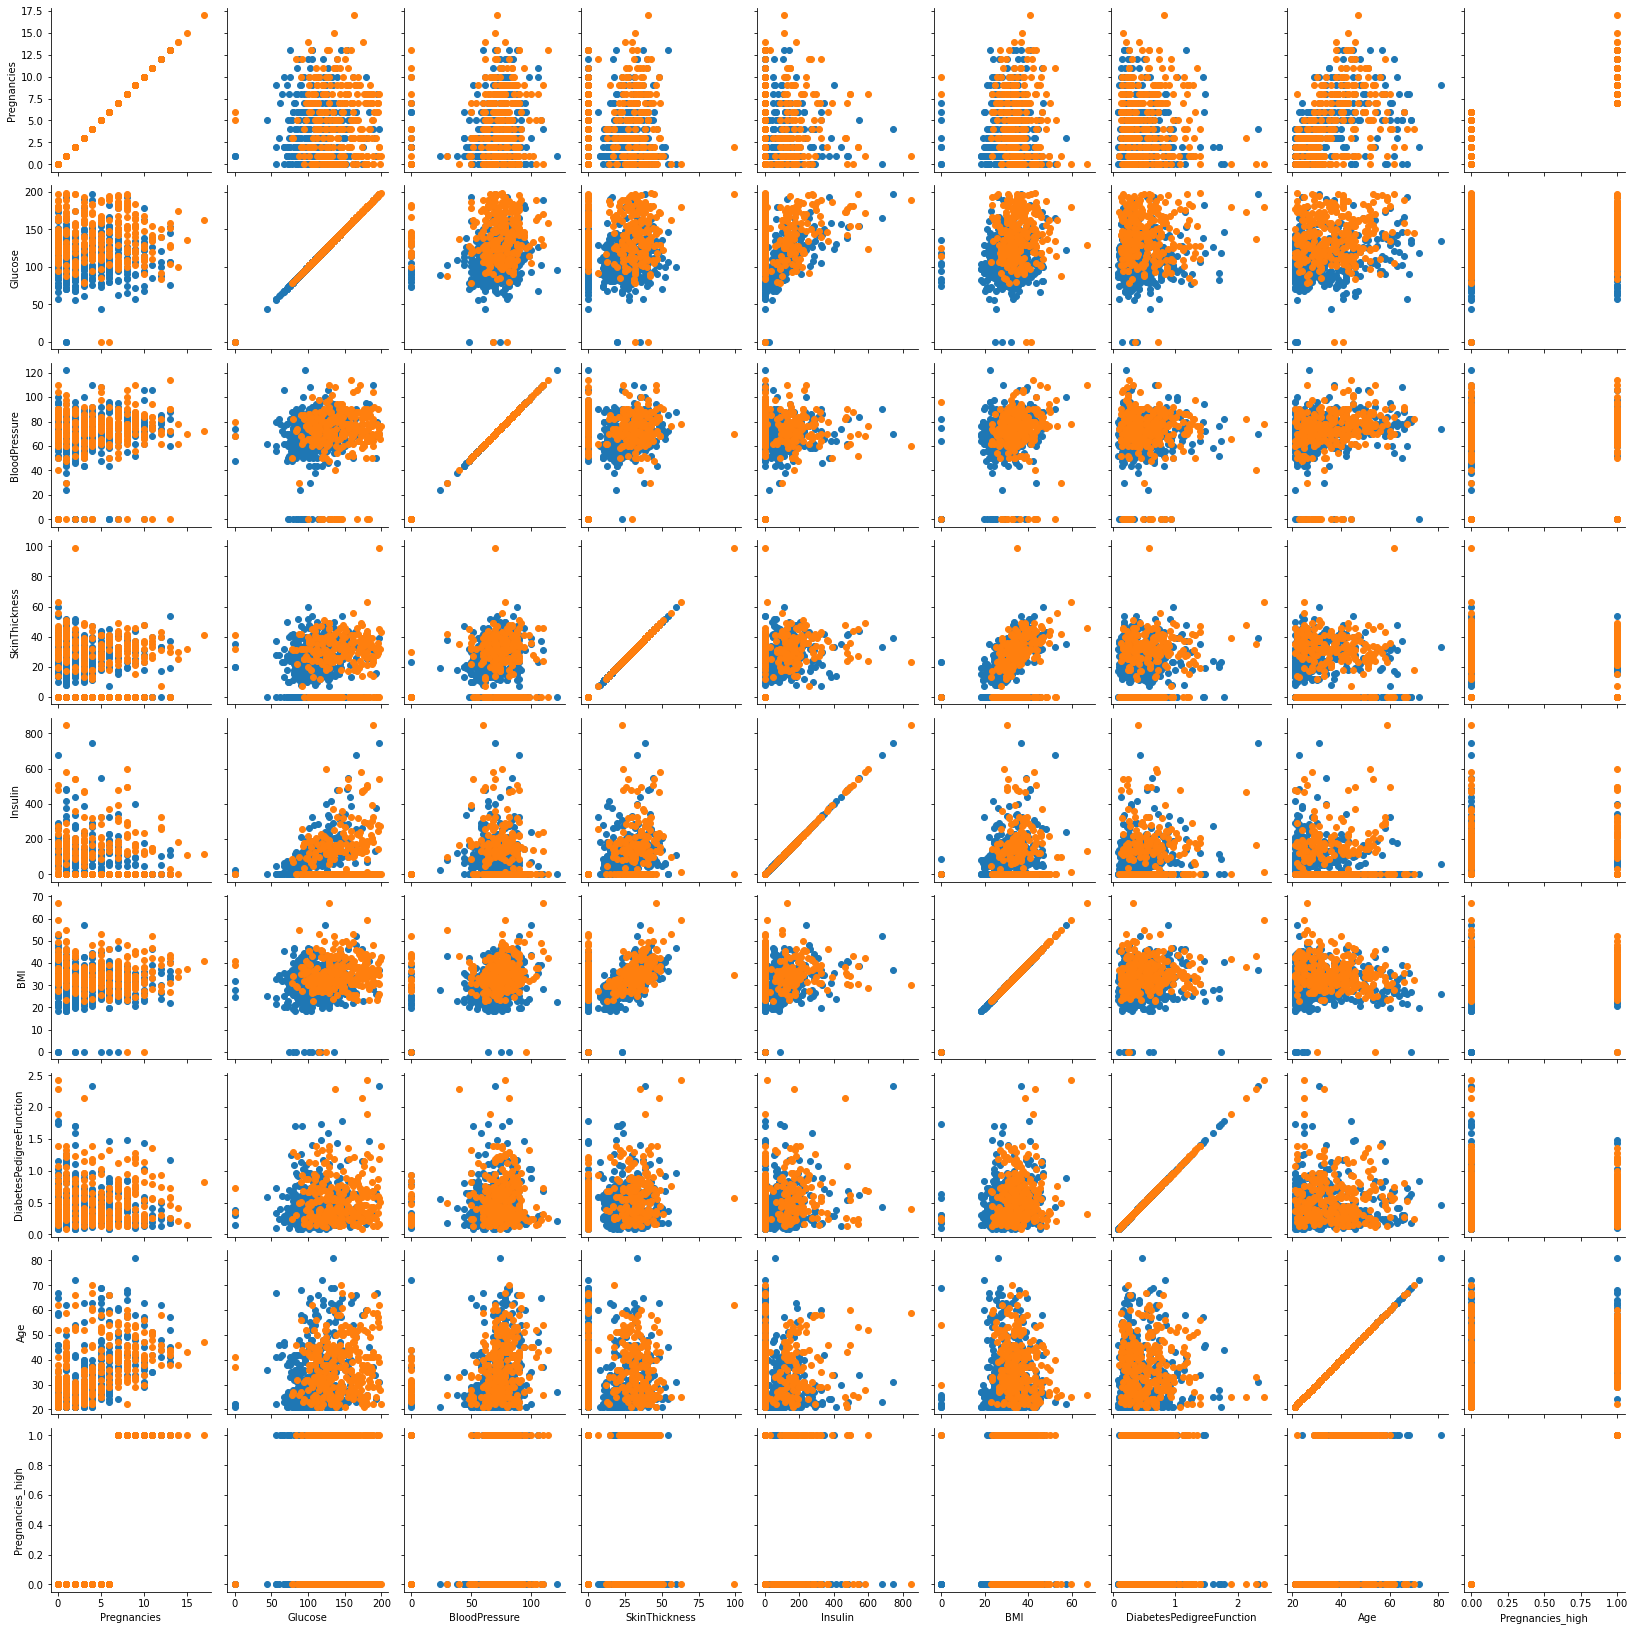

In [50]:
# PairGrid를 통해 모든 변수에 대해 Outcome에 따른 scatterplot을 그려보자.
g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

BMI 지수와 피부두께는 상관관계가 있으나 기준점을 잡기 애매하다.

## 상관분석

피어슨 상관계수 = r = X와 Y가 함께 변하는 정도 / X와 Y가 각각 변하는 정도

- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [51]:
# 정답 값인 Outcome을 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만든다.
# 상관계수를 구한다.
df_corr = df.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


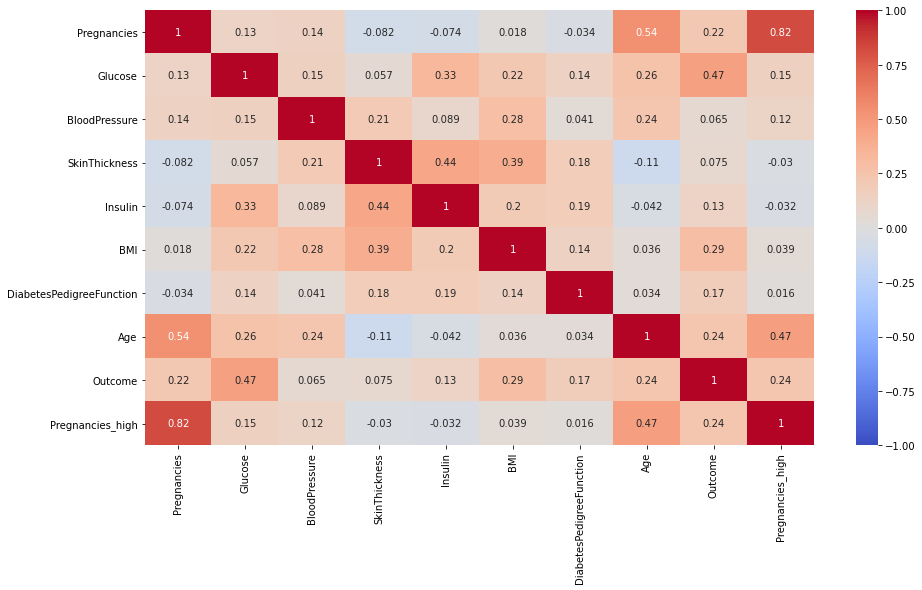

In [52]:
# 위에서 구한 상관계수를 heatmap으로 시각화한다.
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

음의 상관관계는 없다. 대체로 변수 간 양의 상관관계가 나타난다.

Pregnancies_high는 Pregnancies로 만든 변수이기 때문에 상관계수가 크다.

Pregnancies_high를 지우고 결측치를 처리한 후 상관관계를 살펴보자.

In [53]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix['Outcome'] = df['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [54]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


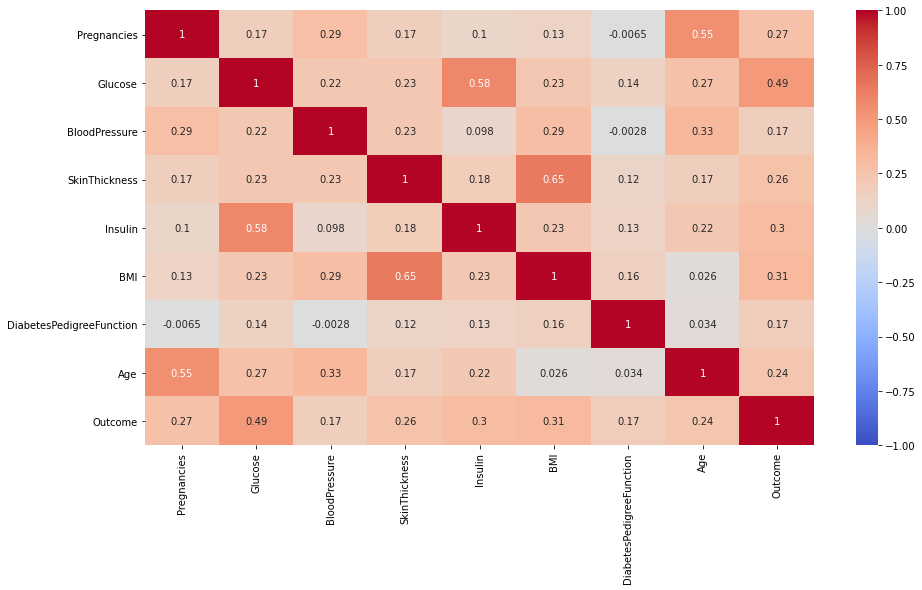

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [56]:
df_corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
Pregnancies                 0.268218
SkinThickness               0.259491
Age                         0.238356
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64

### 상관계수가 높은 변수끼리 보기

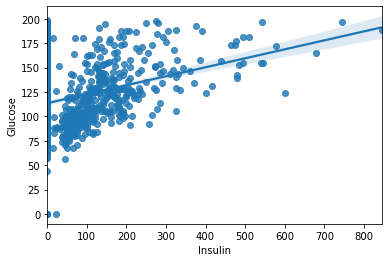

In [57]:
# insulin과 Glucose로 regplot 그리기
sns.regplot(data=df, x='Insulin', y='Glucose')

In [ ]:
# insulin과 Glucose로 regplot 그리기
sns.regplot(data=df_matrix, x='Insulin', y='Glucose')

위 그래프를 보면 인슐린 값 중 이상치가 있는 것으로 보인다.

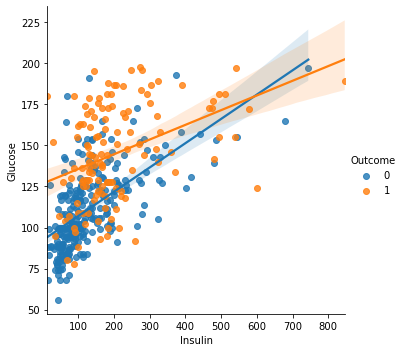

In [59]:
sns.lmplot(data=df_matrix, x='Insulin', y='Glucose', hue='Outcome')

포도당과 인슐린이 100이하면 당뇨병에 해당하지 않은 것으로 보인다.

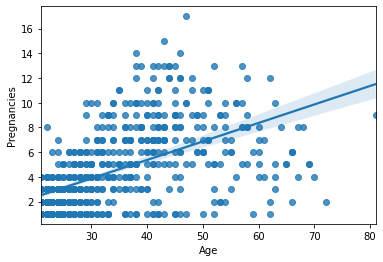

In [60]:
# Age와 Pregnancies로 regplot 그리기
sns.regplot(data=df_matrix, x='Age', y='Pregnancies')

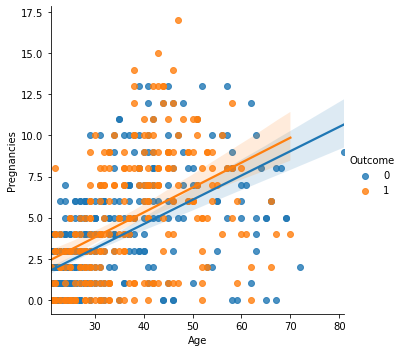

In [61]:
# Age와 Pregnancies로 lmplot을 그리고 Outcome에 따라 다른 색상으로 표현한다.
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome')

회귀선 큰 차이 없어 보인다.

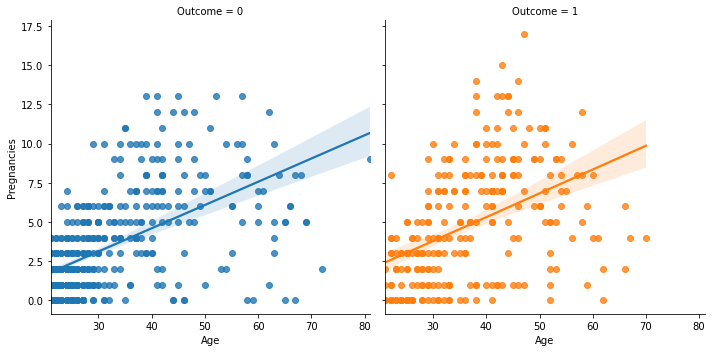

In [62]:
# Age와 Pregnancies로 lmplot을 그리고 Outcome에 따라 다른 열로 표현한다.
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')